Best: [0.33938977] [4.03292999]
Best: [0.95740359] 753.3571125198549
Best: [1.80328394] 1055.4189469355217
Best: [2.78996338] 1402.1753679591814
Best: [3.8181668] 1767.3603497805188
Best: [4.75103923] 2057.88993966813
Best: [5.49733717] 2330.3748657508845
Best: [6.15544808] 2785.45537496028
Best: [6.86074394] 3284.57118083014
Best: [7.74784979] 3842.496113867451
Best: [8.85359085] 4369.560246593733
Best: [10.24250242] 5045.368778723265
Best: [11.87874953] 5708.7885675760945
Best: [13.7382351] 6480.722926463658
Best: [15.6403703] 7102.796518058328
Best: [17.34350829] 7594.759281125134
Best: [18.70601869] 8070.1595872471635
Best: [19.91536317] 8821.992153274348
Best: [21.21839352] 9632.091391620259
Best: [22.84208847] 10505.584024758615
Best: [24.92613345] 11433.199283835347
Best: [27.48850852] 12397.036774259388
Best: [30.48379462] 13442.303548777312
Best: [33.80481462] 14529.805169060037
Best: [37.13998963] 15431.491319953157
Best: [40.08583527] 16134.846293159826
Best: [42.44251178] 1

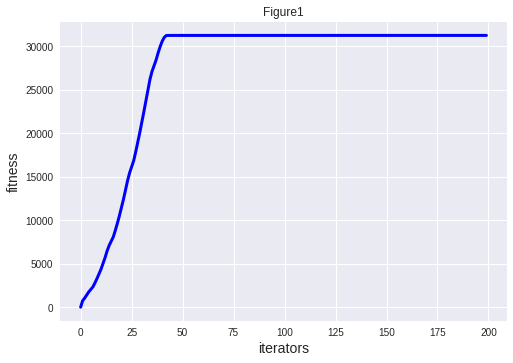

In [62]:
# coding: utf-8
import numpy as np
import random
import matplotlib.pyplot as plt
 
 
# ----------------------PSO参数设置---------------------------------
class PSO():
    def __init__(self, pN, dim, max_iter):
        self.w = 0.8
        self.c1 = 1
        self.c2 = 1
        self.r1 = 0.6
        self.r2 = 0.3
        self.pN = pN  # 粒子数量
        self.dim = dim  # 搜索维度
        self.max_iter = max_iter  # 迭代次数
        self.X = np.zeros((self.pN, self.dim))  # 所有粒子的位置和速度
        self.V = np.zeros((self.pN, self.dim))
        self.pbest = np.zeros((self.pN, self.dim))  # 个体经历的最佳位置和全局最佳位置
        self.gbest = np.zeros((1, self.dim))
        self.p_fit = np.zeros(self.pN)  # 每个个体的历史最佳适应值
        self.fit = 150  # 全局最佳适应值
 
    # ---------------------目标函数Sphere函数-----------------------------
    def function(self, X):
        return (500-2*X)*X
 
    # ---------------------初始化种群----------------------------------
    def init_Population(self):
        for i in range(self.pN):
            for j in range(self.dim):
                self.X[i][j] = random.uniform(0, 1)
                self.V[i][j] = random.uniform(0, 1)
            self.pbest[i] = self.X[i]
            tmp = self.function(self.X[i])
            self.p_fit[i] = tmp
            if tmp < self.fit:
                self.fit = tmp
                self.gbest = self.X[i]
 
                # ----------------------更新粒子位置----------------------------------
 
    def iterator(self):
        fitness = []
        for t in range(self.max_iter):
            for i in range(self.pN):  # 更新gbest\pbest
                temp = self.function(self.X[i])
                if temp > self.p_fit[i]:  # 更新个体最优
                    self.p_fit[i] = temp
                    self.pbest[i] = self.X[i]
                    if self.p_fit[i] > self.fit:  # 更新全局最优
                        self.gbest = self.X[i]
                        self.fit = self.p_fit[i]
            for i in range(self.pN):
                self.V[i] = self.w * self.V[i] + self.c1 * self.r1 * (self.pbest[i] - self.X[i]) + \
                            self.c2 * self.r2 * (self.gbest - self.X[i])
                self.X[i] = self.X[i] + self.V[i]
            fitness.append(self.fit)
            print("Best:",self.X[0], end=" ")
            print(self.fit)  # 输出最优值
        return fitness
 
        # ----------------------程序执行-----------------------
 
 
my_pso = PSO(pN=30, dim=1, max_iter=200)
my_pso.init_Population()
fitness = my_pso.iterator()
# -------------------画图--------------------
plt.figure(1)
plt.title("Figure1")
plt.xlabel("iterators", size=14)
plt.ylabel("fitness", size=14)
t = np.array([t for t in range(0, 200)])
fitness = np.array(fitness)
plt.plot(t, fitness, color='b', linewidth=3)
plt.show()